<img height="42" src="../logos.png" width="320"/>

**Avaliação com Utilizadores** -- Propostas de Solução

# Tarefa 5

Dado o ECG anterior, já invertido e com ruído miogénico adicionado:

In [3]:
from ltbio.biosignals import Biosignal
ecg = Biosignal.withAdditiveNoise(Biosignal.load('../data/ecg.biosignal') * -1, Biosignal.load('../data/emg.biosignal'))

**Resample**
Opção de Resolução 1:

In [4]:
ecg.sampling_frequency

500.0

In [5]:
ecg.resample(100)

In [6]:
ecg.sampling_frequency

100.0

**Filtrar**
Opção de Resolução 1:

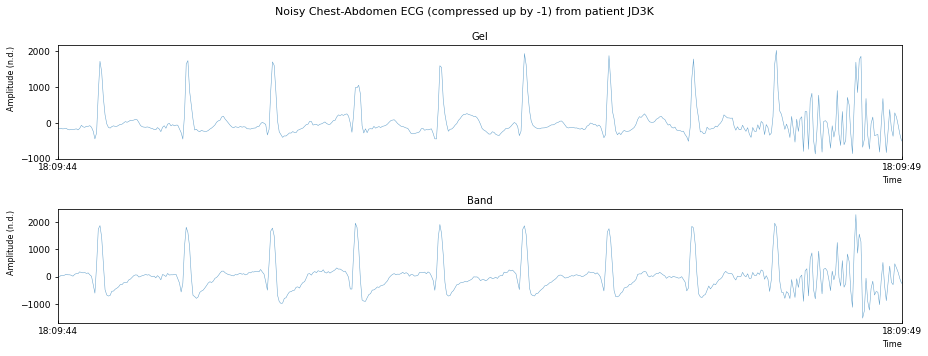

In [7]:
from ltbio.processing.filters.FrequencyDomainFilter import *
passband = FrequencyDomainFilter(FrequencyResponse.FIR, BandType.BANDPASS, (1,40), 150)
ecg.filter(passband)
ecg.preview.plot()
pass

Opção de Resolução 2:

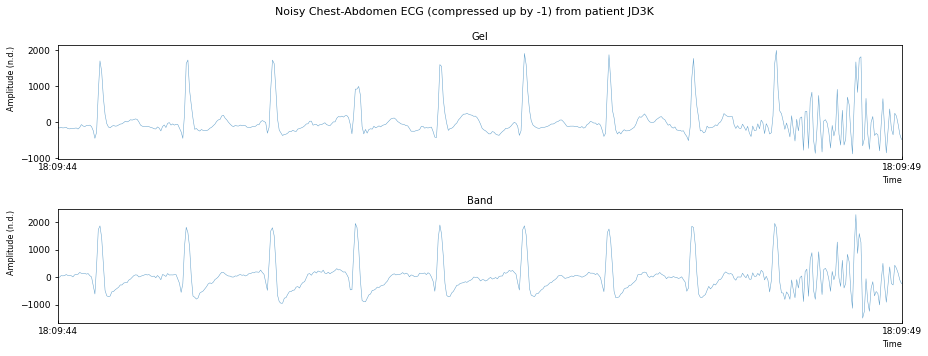

In [8]:
ecg = passband(ecg)
ecg.preview.plot()
pass

**Normalizar**
Opção de Resolução 1:

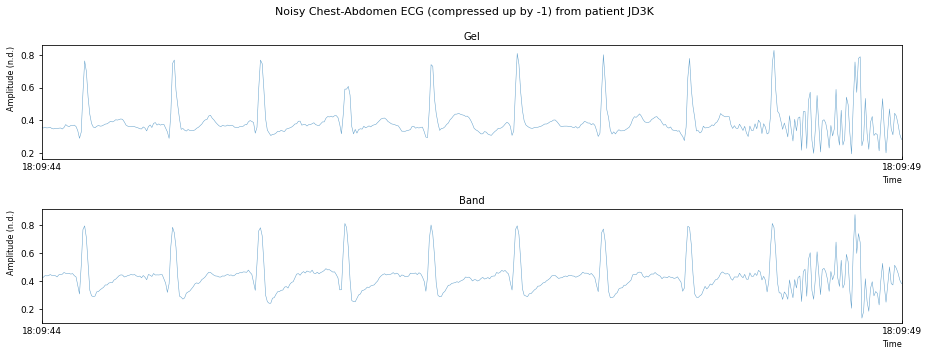

In [9]:
from ltbio.processing.formaters import Normalizer
normalizer = Normalizer('minmax')
ecg = normalizer(ecg)
ecg.preview.plot()
pass

**Segmentar**
Opção de Resolução 1:

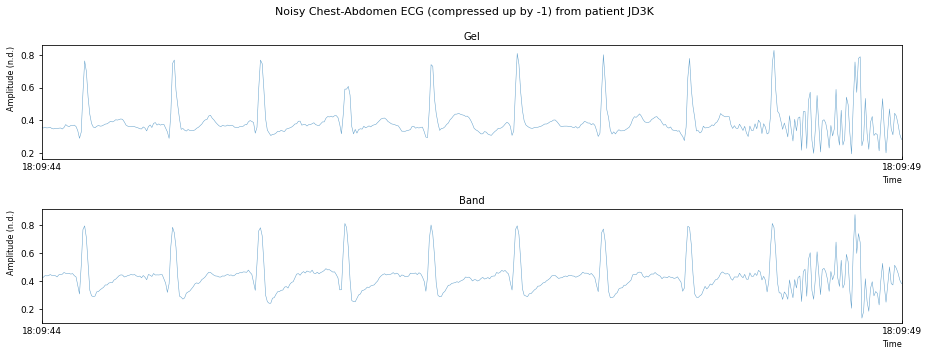

In [10]:
from datetime import timedelta
from ltbio.processing.formaters import Segmenter
segmenter = Segmenter(timedelta(seconds=2))
ecg2 = normalizer(ecg)
ecg2.preview.plot()
pass

**Alternativamente, o utilizador mais experiente pode automatizar a filtragem, normalização e segmentação.**
Opção de Resolução 1 (com uma Pipeline):

In [11]:
pipeline = passband >> normalizer >> segmenter
ecg2 = pipeline(ecg)

Opção de Resolução 2 (com um ciclo for):

In [12]:
for x in (passband, normalizer, segmenter):
    ecg = x(ecg)